# Customer Churn Prediction – Telco (End‑to‑End Portfolio Project)

## 1. Introduction

This project predicts customer churn for a telecom company using the Telco Customer Churn dataset from Kaggle.

The goal is to identify which customers are at risk of leaving so the business can target retention campaigns and reduce revenue loss.

The dataset contains information about ~7,000 customers, their contracts, services, billing, and whether they churned (Yes/No).

In [33]:
from pathlib import Path
import pandas as pd


In [34]:

import os


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


data_path = Path('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')


df = pd.read_csv(data_path)
df.head()


/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Exploratory data analysis (EDA)

After converting TotalCharges to numeric and removing 11 rows with missing values, the final dataset contains 7,032 customers and 21 columns.

In [35]:
df.shape

(7043, 21)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From info we observed that all the columns are types object except the monthly charges , SeniorCitizen ,  tenure columnuns  are types float64, so we need to correct the type's some of them like TotalCharges to float54

In [37]:
# fix totalcharges type + quick check 
# check strange values in totalcharges :
df['TotalCharges'].replace(' ', pd.NA, inplace=True)



/tmp/ipykernel_47/1502334365.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].replace(' ', pd.NA, inplace=True)


In [38]:
#Convert to numeric:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].dtype

dtype('float64')

In [39]:
#check the missing values in the TotalCharges
df['TotalCharges'].isna().sum()

11

In [40]:
print(df.isna().mean()*100)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64


In [41]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [42]:
#Confirm numeric columns:
df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [43]:
df['Churn'].value_counts()
df['Churn'].value_counts(normalize= True)



Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

#### Target variable: Churn (Yes/No classification).

#### About 26.5% of customers churned and 73.5% stayed, so the classes are imbalanced and metrics like accuracy alone may be misleading.

#### Handle missing Total Charges 
There are only 11 missing rows out of 7043, so the simplest clean choice is to drop them.

In [44]:
df = df.dropna(subset=['TotalCharges'])

In [45]:
df.shape

(7032, 21)

In [46]:
df['TotalCharges'].isna().sum()

0

### we see the row count decrease by 11 and 0 missing values in TotalCharges.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_47/1231932468.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_47/1231932468.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_la

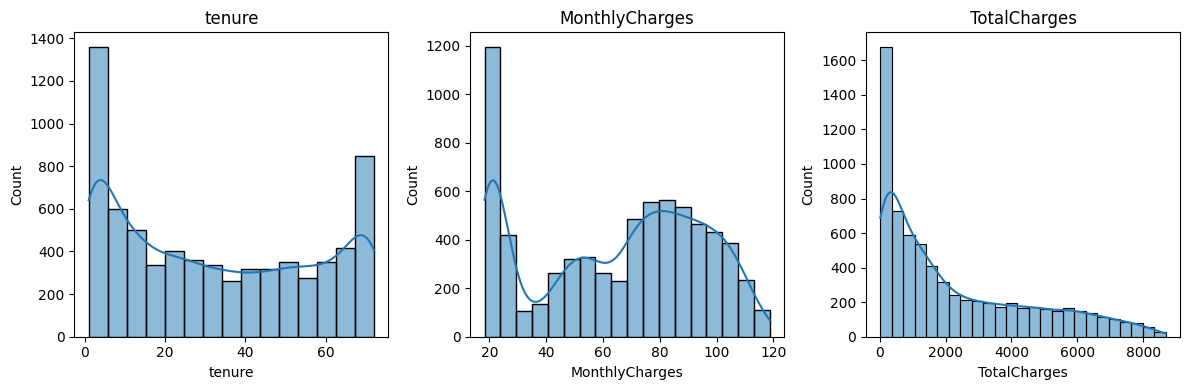

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols, 1):
   plt.subplot(1, 3, i)
   sns.histplot(data=df, x=col, kde=True)
   plt.title(col)

   plt.tight_layout()

 ### For a clearer interpretation:
Many customers are either very new (low tenure) or long‑term (high tenure).

Monthly charges range roughly from 20 to 120; higher charges seem common.

Total charges are strongly skewed to the right; most customers have low to medium lifetime spend, with a few very high spenders.

#### categorical EDA with churn :

In [48]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'customerID']
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [49]:
for col in ['gender', 'Contract', 'InternetService']:
    print(f'\n=== {col} ===')
    print(df.groupby(col)['Churn'].value_counts(normalize=True))


=== gender ===
gender  Churn
Female  No       0.730405
        Yes      0.269595
Male    No       0.737954
        Yes      0.262046
Name: proportion, dtype: float64

=== Contract ===
Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887228
                Yes      0.112772
Two year        No       0.971513
                Yes      0.028487
Name: proportion, dtype: float64

=== InternetService ===
InternetService  Churn
DSL              No       0.810017
                 Yes      0.189983
Fiber optic      No       0.581072
                 Yes      0.418928
No               No       0.925658
                 Yes      0.074342
Name: proportion, dtype: float64


### a simple barplot for Contract vs churn:

Text(0.5, 1.0, 'Churn rate by Contract')

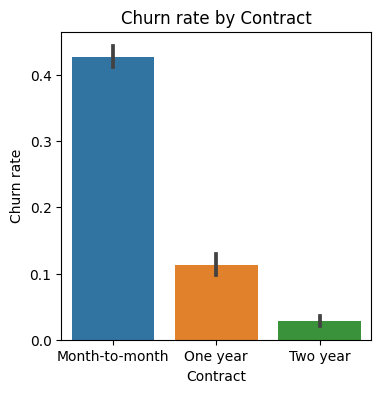

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
sns.barplot(data=df, x='Contract', y=df['Churn'].map({'No':0,'Yes':1}))
plt.ylabel('Churn rate')
plt.title('Churn rate by Contract')

Month‑to‑month contracts have the highest churn rate (around 43%), while one‑year and especially two‑year contracts churn much less.

Customers without OnlineSecurity or TechSupport services have higher churn rates compared to those who have these services.

## 4. Modeling (Logistic Regression and Random Forest)


Split the data into train and test sets with 80/20 ratio, using stratify on ChurnFlag to keep the same churn proportion.

Used a ColumnTransformer to one‑hot encode categorical variables and pass numeric variables as they are.

In [51]:
#Encode target as 0/1:

df['ChurnFlag'] = df['Churn'].map({'No': 0, 'Yes': 1})
df['ChurnFlag'].value_counts()

ChurnFlag
0    5163
1    1869
Name: count, dtype: int64

In [52]:
#Drop customerID because it is just an identifier:

df = df.drop(columns=['customerID'])

#### Train/test split and preprocessing

In [53]:
#Define X (features) and y (target):

target = 'ChurnFlag'
X = df.drop(columns=['Churn', 'ChurnFlag'])
y = df[target]

In [54]:
#Separate numeric and categorical columns:

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = [col for col in X.columns if col not in num_cols]

### Baseline model: Logistic Regression:

Logistic Regression in a pipeline with one‑hot encoding.

Test accuracy ≈ 0.80.

For churners (class 1), precision ≈ 0.64, recall ≈ 0.57, f1 ≈ 0.60.

This model is chosen as the main model because it performs better on churners than the Random Forest tried later.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [56]:
#train/test split (stratify to keep imbalance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [57]:
#preprocessing: one-hot for categoricals, pass-through for numerics
preprocess = ColumnTransformer(
transformers=[
('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
('num', 'passthrough', num_cols)
]
)

log_reg = LogisticRegression(max_iter=1000)

clf = Pipeline(steps=[
('preprocess', preprocess),
('model', log_reg)
])

clf.fit(X_train, y_train)#

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', 'passthrough',
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model', LogisticRegression(max_iter=1000))])

In [58]:
#Evaluate on test set:

from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[915 118]
 [162 212]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.73      1407
weighted avg       0.79      0.80      0.80      1407



The baseline Logistic Regression model reaches about 80% accuracy. It predicts non‑churn customers quite well, but performance on churners is lower (recall ~57%), which is expected given the class imbalance. The next step is to try tree‑based models and class weighting to improve detection of churners.

#### Random Forest (comparison) : 

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
n_estimators=200,
max_depth=None,
random_state=42,
class_weight='balanced',
n_jobs=-1
)

rf_clf = Pipeline(steps=[
('preprocess', preprocess), # same preprocess as before
('model', rf_model)
])

rf_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', 'passthrough',
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

#### Evaluate Random Forest

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

rf_pred = rf_clf.predict(X_test)

print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[926 107]
 [193 181]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407




Logistic Regression achieved about 80% accuracy on the test set, with recall ≈ 0.57 and f1 ≈ 0.60 for churners (class 1).

For Random Forest: Random Forest with class_weight='balanced' achieved lower recall (~0.48) and f1 (~0.55) for churners, so Logistic Regression was selected as the final model.

## 5. Feature importance and business insights

In [61]:
import numpy as np
ohe = rf_clf.named_steps['preprocess'].named_transformers_['cat']  #Get feature names after preprocessing
cat_feature_names = ohe.get_feature_names_out(cat_cols)
all_feature_names = np.concatenate([cat_feature_names, np.array(num_cols)])

In [62]:
#Get importances
importances = rf_clf.named_steps['model'].feature_importances_

fi = pd.DataFrame({
'feature': all_feature_names,
'importance': importances
}).sort_values(by='importance', ascending=False)

fi.head(10)

,feature,importance
45,TotalCharges,0.139879
43,tenure,0.133981
44,MonthlyCharges,0.120256
34,Contract_Month-to-month,0.070886
36,Contract_Two year,0.035711
16,OnlineSecurity_No,0.030782
25,TechSupport_No,0.028900
41,PaymentMethod_Electronic check,0.026333
14,InternetService_Fiber optic,0.026302
19,OnlineBackup_No,0.018025


 #### Simple barplot of top features

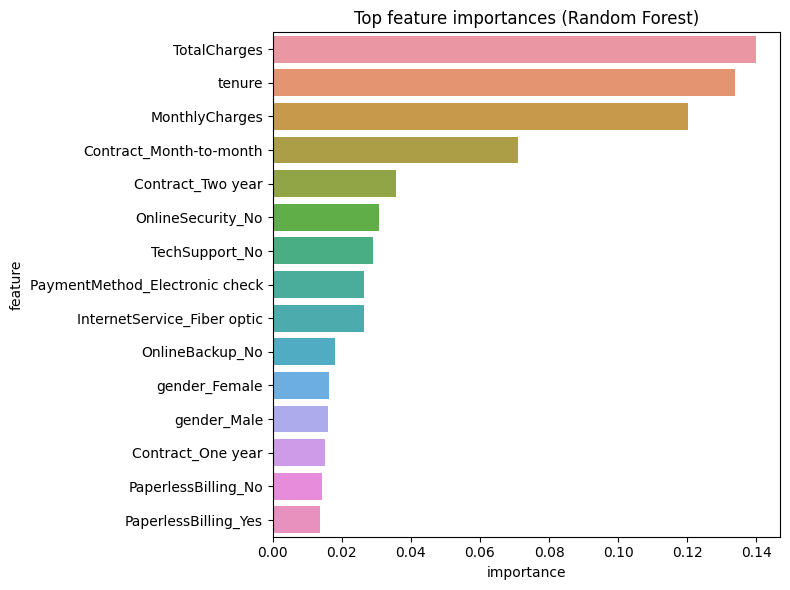

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 15
plt.figure(figsize=(8, 6))
sns.barplot(data=fi.head(top_n), x='importance', y='feature')
plt.title('Top feature importances (Random Forest)')
plt.tight_layout()

#### Key drivers of churn (feature importance) :

Customers with higher total charges and higher monthly charges are more likely to churn, suggesting that expensive plans increase the risk of leaving.

Shorter tenure (newer customers) is strongly associated with higher churn, so the first months of the customer lifecycle are critical for retention.

Month‑to‑month contracts show much higher churn risk than one‑year and two‑year contracts, confirming that long‑term contracts help keep customers.

Lack of OnlineSecurity and TechSupport services is linked to higher churn, which indicates that value‑added support products can reduce cancellations.

Customers paying via electronic check appear more likely to churn compared with other payment methods, which may signal a segment with weaker loyalty or more billing issues.



## 6. Limitations and next steps

This analysis uses one historical dataset from a single telecom company; results may not generalize to all markets.

Class imbalance is only partially handled; future work could try techniques like SMOTE or threshold tuning.

As a next step, the model could be deployed in a simple Streamlit app or integrated into a CRM system to score customers regularly.

